In [92]:
import pandas as pd

import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(mpl.__version__)
# seaborn 스타일 사용
plt.style.use('seaborn-notebook')

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


3.4.3


# 베이스라인 코드

In [151]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [111]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


<AxesSubplot:>

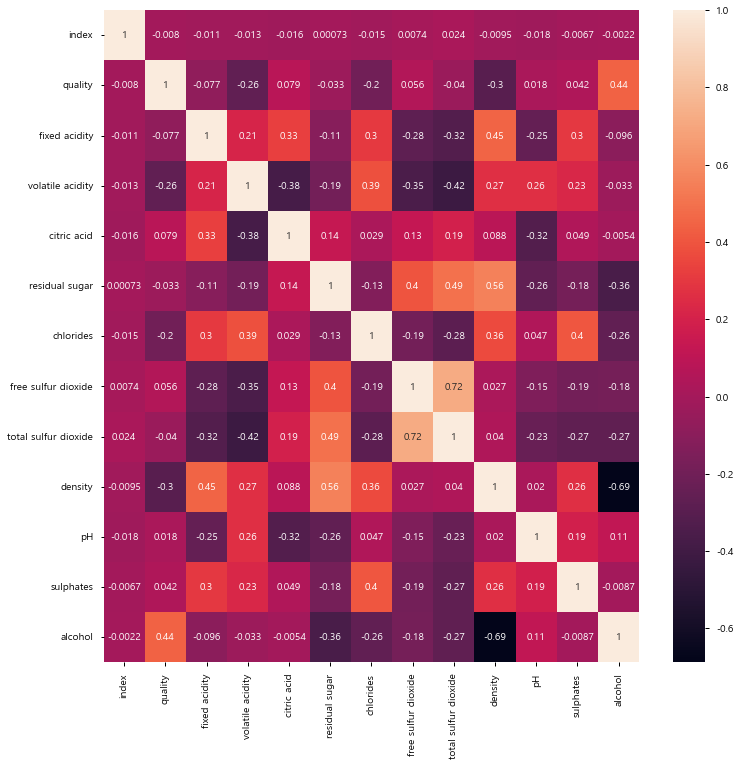

In [112]:
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True)

<AxesSubplot:>

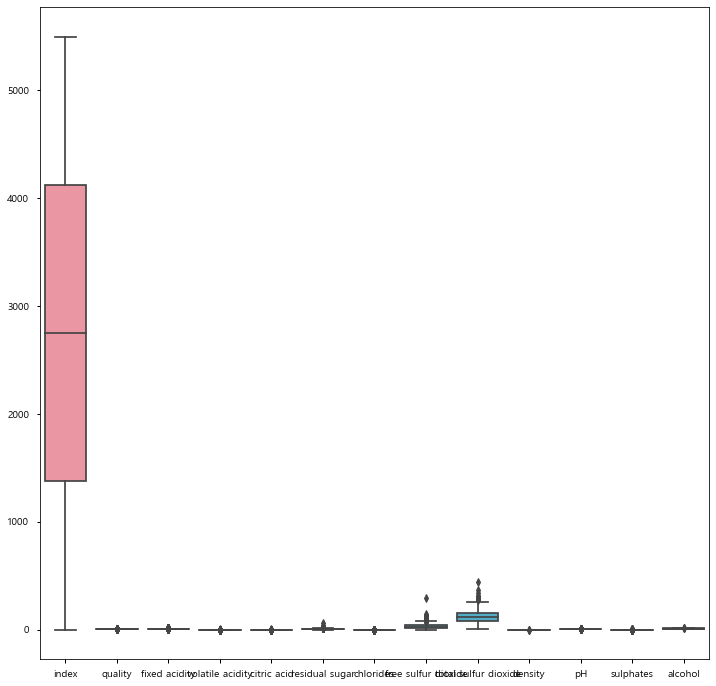

In [153]:
plt.figure(figsize=(12,12))
sns.boxplot(data = train[''])

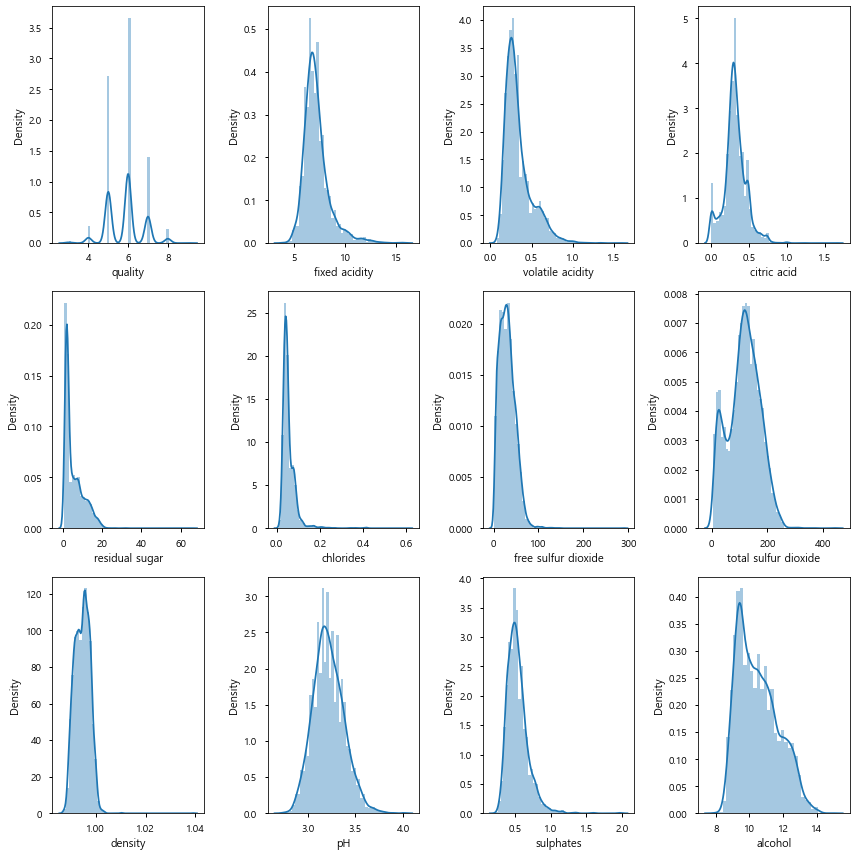

In [6]:
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

In [113]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [114]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [115]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


In [116]:
train.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [12]:
test.isna().sum()

index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [ ]:
X_train = train.drop(['index','quality'], axis = 1)
X_test = test.drop(['index'], axis = 1)
y_train = train['quality']

In [119]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
pred = dt_clf.predict(X_test)

In [19]:
pred

array([5, 6, 6, 5, 6, 5, 6, 7, 6, 7, 6, 6, 7, 7, 6, 5, 6, 6, 6, 6, 6, 6,
       5, 7, 6, 4, 5, 5, 6, 6, 7, 7, 5, 5, 6, 6, 5, 5, 6, 6, 7, 5, 8, 5,
       6, 7, 6, 6, 4, 6, 5, 5, 6, 4, 5, 5, 6, 7, 5, 5, 5, 6, 5, 4, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 4, 6, 6, 7, 7, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 7, 6, 7, 6, 6, 8, 5, 6, 7, 6, 5, 6, 6, 6, 7, 4, 7,
       6, 5, 5, 8, 6, 7, 6, 6, 5, 6, 5, 5, 5, 5, 7, 6, 6, 7, 5, 8, 6, 5,
       5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 6, 5, 4, 6, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 5, 5, 5, 6, 7, 6, 5, 4, 6, 6, 5, 7, 6, 5, 5, 6, 6, 5, 7, 5,
       5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 7, 5, 5, 7, 7, 5, 7, 6, 7, 7,
       7, 5, 6, 6, 7, 6, 6, 5, 6, 5, 7, 7, 7, 5, 6, 6, 6, 6, 6, 7, 7, 6,
       6, 7, 7, 6, 6, 7, 5, 6, 5, 6, 7, 6, 6, 6, 6, 8, 7, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 7, 6, 7, 7,
       5, 6, 6, 6, 5, 5, 5, 5, 6, 7, 8, 6, 5, 7, 7,

In [20]:
dt_clf.feature_importances_

array([0.07147396, 0.11230463, 0.07857282, 0.08735348, 0.08990726,
       0.07380223, 0.09411757, 0.07473227, 0.07737927, 0.10032042,
       0.13704814, 0.00298797])

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_clf = RandomForestClassifier(random_state=0, max_depth=10) 
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
pred

array([6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 7, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 7, 6, 6, 6, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 6, 7, 7,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 8, 6, 5, 7, 7,

In [33]:
submission = pd.read_csv('sample_submission.csv')

In [34]:
submission['quality'] = pred

In [35]:
submission

,index,quality
0,0,6
1,1,6
2,2,6
3,3,6
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [36]:
submission.to_csv('submission.csv',index=False)

## 전처리 시작 

In [54]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [55]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])  # 데이터프레임이 되어버림

train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = scaler.transform(train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])


train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,1,5,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,2,5,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1
3,3,6,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,1
4,4,6,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,1
5493,5493,6,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,1
5494,5494,7,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,1
5495,5495,5,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,1


In [57]:
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,0
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,1
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,0
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,0


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])  # 데이터프레임이 되어버림

test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = scaler.transform(test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])


test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172,1
1,1,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025,0
2,2,-0.553583,-0.395042,-0.335387,-0.057012,-0.466520,0.709907,1.077835,-0.008456,-0.142782,1.063164,-0.864071,1
3,3,-0.032634,-1.151046,0.483796,-0.770714,-0.385503,-0.557489,0.731690,-0.008456,1.905833,-0.449356,-0.355641,1
4,4,-0.330319,-0.511350,-0.403653,-0.728731,-1.033635,-0.419728,-0.774041,-1.516876,-0.329020,-0.449356,1.169649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,-0.107055,1.407739,-2.042019,-0.665758,0.667711,-0.392176,-0.393281,0.898657,2.092070,-0.036850,-0.609856,0
996,996,1.083687,-1.151046,-0.130591,-0.812696,-0.304487,-0.116656,0.229780,-0.214618,0.043455,-1.068114,-0.525118,1
997,997,1.158108,1.814819,-0.403653,-0.791705,0.451667,-1.494260,-1.622097,0.781832,-0.391099,1.406918,-1.033548,0
998,998,-0.181477,0.419117,-0.881510,-0.665758,0.370650,-0.722801,-1.397102,-0.022200,1.098803,0.169402,0.407004,0


In [59]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,1,5,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,2,5,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1
3,3,6,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,1
4,4,6,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,1


In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
X_train = train.drop(['index','quality'], axis = 1)
X_test = test.drop(['index'], axis = 1)

In [62]:
y_train = train['quality']

In [63]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,1
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,1
5493,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,1
5494,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,1
5495,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,1


In [64]:
y_train

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, max_depth=10) 
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
pred

array([6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 7, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 5, 7, 5, 5, 6, 7, 6, 6, 6, 7, 6, 6, 7, 5, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 7,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 8, 6, 5, 7, 6,

In [156]:
submission = pd.read_csv('sample_submission.csv')

submission['quality'] = pred

submission

submission.to_csv('submission.csv',index=False)

## X_train 이상치 제거, y_train index 맞춤

In [128]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [129]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [130]:
X_train = train.drop(['index','quality'], axis = 1)
X_test = test.drop(['index'], axis = 1)
y_train = train['quality']

In [131]:
for i in range(len(X_train.columns)-1):
    quantile_25 = np.quantile(X_train[X_train.columns[i]] , 0.25)
    quantile_75 = np.quantile(X_train[X_train.columns[i]] , 0.75)
    IQR = quantile_75 - quantile_25
    minimum = quantile_25 - 1.5 * IQR
    maximum = quantile_75 + 1.5 * IQR
    X_train_outer = X_train[(X_train[X_train.columns[i]] < minimum) | (X_train[X_train.columns[i]] > maximum)]
    X_train = X_train.drop(X_train_outer.index, axis = 0)

In [132]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.21,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.40,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
5,6.0,0.19,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.15,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [133]:
y_train = y_train[X_train.index]

In [134]:
y_train

1       5
2       5
3       6
4       6
5       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 3920, dtype: int64

In [135]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,0
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,1
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,0
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,0


In [126]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, max_depth=10) 
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
pred

array([6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 6, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 7, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5,
       5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 7, 6, 5, 7, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 5, 6, 5, 5, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5,
       6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 7, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 6, 5, 7,
       5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 7, 6, 5, 7, 6,
       5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 8, 6, 5, 7, 6,

In [127]:
submission = pd.read_csv('sample_submission.csv')

submission['quality'] = pred

submission

submission.to_csv('submission.csv',index=False)

# X_train 이상치제거 + 정규화

In [136]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [137]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [138]:
X_train = train.drop(['index','quality'], axis = 1)
X_test = test.drop(['index'], axis = 1)
y_train = train['quality']

In [139]:
for i in range(len(X_train.columns)-1):
    quantile_25 = np.quantile(X_train[X_train.columns[i]] , 0.25)
    quantile_75 = np.quantile(X_train[X_train.columns[i]] , 0.75)
    IQR = quantile_75 - quantile_25
    minimum = quantile_25 - 1.5 * IQR
    maximum = quantile_75 + 1.5 * IQR
    X_train_outer = X_train[(X_train[X_train.columns[i]] < minimum) | (X_train[X_train.columns[i]] > maximum)]
    X_train = X_train.drop(X_train_outer.index, axis = 0)

In [140]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.21,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.40,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
5,6.0,0.19,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.15,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

X_train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = scaler.transform(X_train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])


X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1,2.262514,3.229726,-2.007672,-0.746367,1.769710,-1.497684,-1.865946,1.030626,-0.088631,0.890928,-0.907823,0
2,1.183721,-0.727090,0.772212,-0.831158,0.983172,-0.777185,0.181956,-0.791171,-1.054493,0.243203,0.247663,1
3,0.104928,-0.727090,-0.117351,0.016758,0.117981,-0.253186,-0.458013,-0.032679,0.394300,0.058139,0.165128,1
4,1.063855,1.152397,-0.673328,0.758685,1.140480,-0.056686,1.035248,0.534417,-1.123483,-0.589585,0.247663,1
5,-1.093730,-0.924931,0.549821,0.801081,-0.983172,-1.039185,-1.695287,-0.280784,-0.847523,1.538652,1.155546,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.943989,-1.320613,-0.339742,-0.979544,-1.219134,-1.497684,-1.396635,-0.280784,1.015211,-0.959713,-0.412615,1
5493,-0.734132,-1.023851,0.438626,-1.000742,-0.825865,-0.449685,-0.394016,-1.152694,-0.295602,0.150671,0.330198,1
5494,1.063855,-1.320613,0.216235,-1.021939,-0.747211,-0.122186,-0.777998,-1.074719,-0.916513,2.093844,0.577802,1
5495,-0.374535,1.251318,-0.117351,-0.915950,-0.196634,-0.973685,-0.607340,-0.723828,-0.502572,-0.774649,-0.082476,1


In [142]:
y_train = y_train[X_train.index]

In [143]:
y_train

1       5
2       5
3       6
4       6
5       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 3920, dtype: int64

In [144]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,0
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,1
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,0
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,0


In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])  # 데이터프레임이 되어버림

X_test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = scaler.transform(X_test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])


X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172,1
1,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025,0
2,-0.553583,-0.395042,-0.335387,-0.057012,-0.466520,0.709907,1.077835,-0.008456,-0.142782,1.063164,-0.864071,1
3,-0.032634,-1.151046,0.483796,-0.770714,-0.385503,-0.557489,0.731690,-0.008456,1.905833,-0.449356,-0.355641,1
4,-0.330319,-0.511350,-0.403653,-0.728731,-1.033635,-0.419728,-0.774041,-1.516876,-0.329020,-0.449356,1.169649,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.107055,1.407739,-2.042019,-0.665758,0.667711,-0.392176,-0.393281,0.898657,2.092070,-0.036850,-0.609856,0
996,1.083687,-1.151046,-0.130591,-0.812696,-0.304487,-0.116656,0.229780,-0.214618,0.043455,-1.068114,-0.525118,1
997,1.158108,1.814819,-0.403653,-0.791705,0.451667,-1.494260,-1.622097,0.781832,-0.391099,1.406918,-1.033548,0
998,-0.181477,0.419117,-0.881510,-0.665758,0.370650,-0.722801,-1.397102,-0.022200,1.098803,0.169402,0.407004,0


In [149]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0, max_depth=5) 
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
pred

array([6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 7, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6,
       6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6,
       6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 5, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 7, 6,

In [150]:
submission = pd.read_csv('sample_submission.csv')

submission['quality'] = pred

submission

submission.to_csv('submission.csv',index=False)

# import lightgbm as lgbm

In [159]:
import lightgbm as lgbm

In [160]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [161]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [162]:
X_train = train.drop(['index','quality'], axis = 1)
X_test = test.drop(['index'], axis = 1)
y_train = train['quality']

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

X_train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = scaler.transform(X_train[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])


X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,1
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,1
5493,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,1
5494,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,1
5495,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,1


In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])  # 데이터프레임이 되어버림

X_test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = scaler.transform(X_test[['fixed acidity','volatile acidity','citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])


X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172,1
1,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025,0
2,-0.553583,-0.395042,-0.335387,-0.057012,-0.466520,0.709907,1.077835,-0.008456,-0.142782,1.063164,-0.864071,1
3,-0.032634,-1.151046,0.483796,-0.770714,-0.385503,-0.557489,0.731690,-0.008456,1.905833,-0.449356,-0.355641,1
4,-0.330319,-0.511350,-0.403653,-0.728731,-1.033635,-0.419728,-0.774041,-1.516876,-0.329020,-0.449356,1.169649,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.107055,1.407739,-2.042019,-0.665758,0.667711,-0.392176,-0.393281,0.898657,2.092070,-0.036850,-0.609856,0
996,1.083687,-1.151046,-0.130591,-0.812696,-0.304487,-0.116656,0.229780,-0.214618,0.043455,-1.068114,-0.525118,1
997,1.158108,1.814819,-0.403653,-0.791705,0.451667,-1.494260,-1.622097,0.781832,-0.391099,1.406918,-1.033548,0
998,-0.181477,0.419117,-0.881510,-0.665758,0.370650,-0.722801,-1.397102,-0.022200,1.098803,0.169402,0.407004,0


In [165]:
model = lgbm.LGBMClassifier()
model.fit(X_train,y_train)

LGBMClassifier()

In [166]:
pred = model.predict(X_test)
pred

array([5, 5, 6, 5, 6, 6, 6, 6, 6, 7, 6, 5, 7, 6, 5, 5, 6, 7, 6, 5, 6, 7,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6,
       6, 7, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 7, 6, 7, 5, 6, 5, 4, 6, 6, 5, 5,
       6, 7, 6, 5, 6, 6, 6, 7, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 6, 6, 7, 7, 6, 6, 5, 6, 7, 6, 5, 6, 6, 5, 7, 6, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 8, 6, 5, 8, 6, 5,
       6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 5, 6, 5, 6, 7, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 7, 6, 6, 7, 6, 7, 5, 6, 7, 7, 6, 6, 6, 7, 8, 6, 7, 5, 5, 7,
       5, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 6, 7, 6,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 8, 5, 5, 7, 7,

In [167]:
submission = pd.read_csv('sample_submission.csv')

submission['quality'] = pred

submission

submission.to_csv('submission.csv',index=False)

# 보팅

In [168]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [169]:
LGBM = LGBMClassifier()
XGB = XGBClassifier()
RF = RandomForestClassifier()

# VotingClassifier 정의
VC = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')

In [170]:
VC.fit(X_train,y_train)

[21:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=None, gpu_id=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_es

In [171]:
pred = VC.predict(X_test)

In [172]:
pred

array([5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 7, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 8, 6, 5, 8, 6, 5,
       6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 6, 7, 6, 7, 5, 6, 7, 7, 6, 6, 6, 7, 6, 6, 7, 6, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 6, 7, 7,
       6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 8, 5, 5, 7, 7,

In [173]:
submission = pd.read_csv('sample_submission.csv')

submission['quality'] = pred

submission

submission.to_csv('submission.csv',index=False)